<div style="text-align: center;">
    <h1>Introduction to Quantum Programming with Qiskit</h1>
</div>


<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Qiskit-Logo.svg" style="height:300px;" />
</div>

In [1]:
from utils import *

## First quantum circuits

1- Bloch Sphere representation

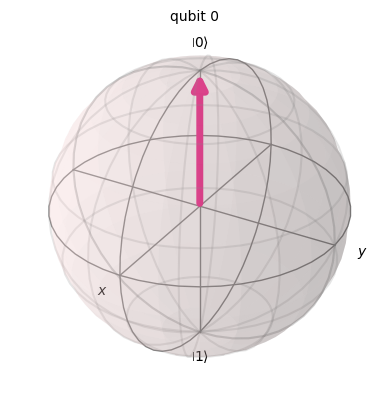

In [2]:
# |0>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
draw_state(qc,latex=False)

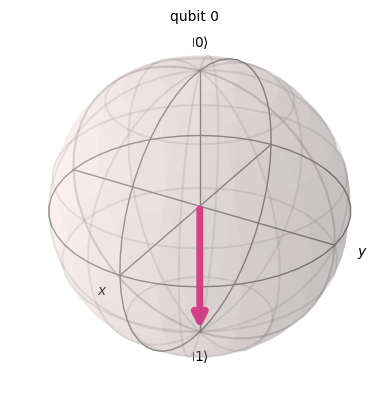

In [3]:
# |1>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
draw_state(qc,latex=False)

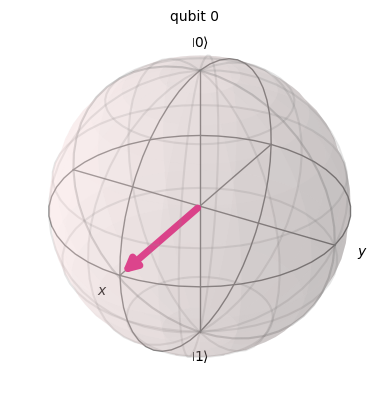

In [4]:
# |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
draw_state(qc,latex=False)

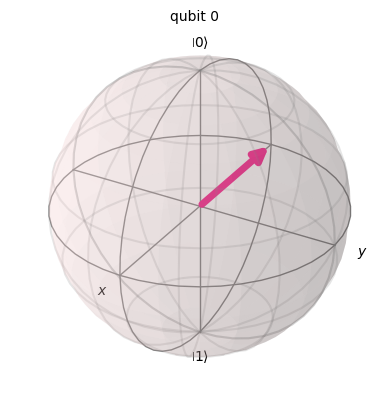

In [5]:
# |->
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
qc.h(q)
draw_state(qc,latex=False)

2- Bloch Sphere representation with two qubits

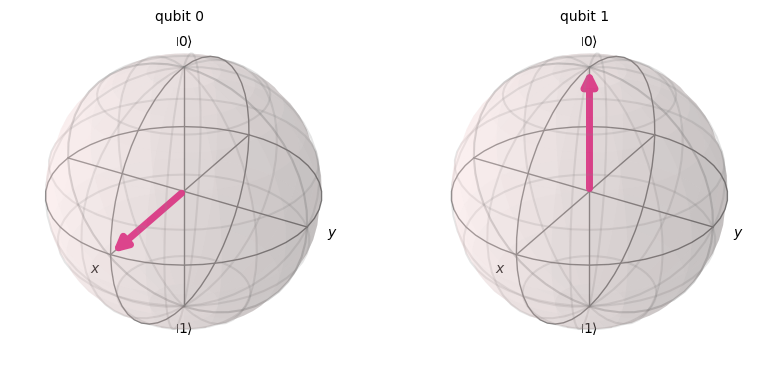

In [6]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
draw_state(qc)

3- Bloch Sphere representation of the Bell state

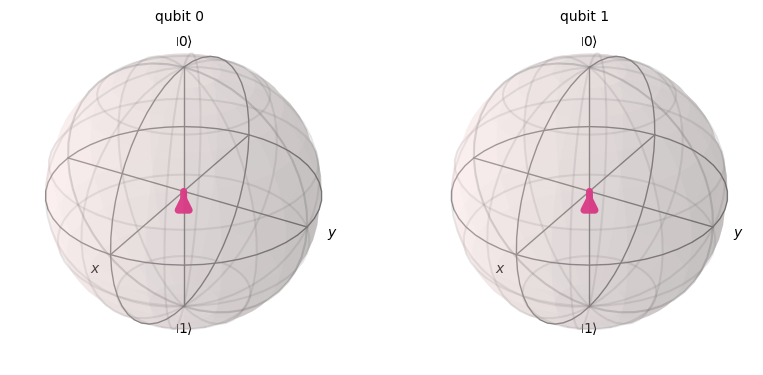

In [7]:
# |Bell>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cx(q[0],q[1])
draw_state(qc)

The state is entangled, therefore it is not possible to describe the state of each qubit independently.

4- Preparing an equal superposition for two qubits

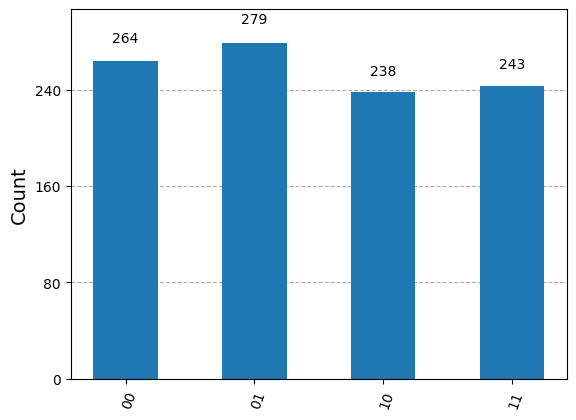

In [8]:
# We run the circuit and get an average of the measurement results
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
qc = QuantumCircuit(q,c)
qc.h(q)
qc.measure(q,c)
run(qc,plot=True)

In [9]:
# We plot the statevector of the qubits
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.h(q)
draw_state(qc,latex=True)

<IPython.core.display.Latex object>

5- Preparing an EPR pair on 3 qubits

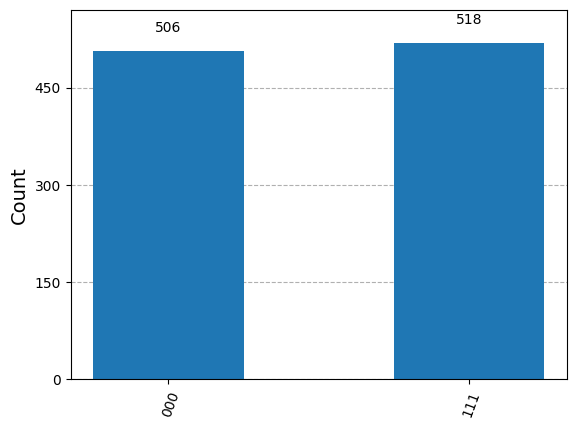

In [10]:
# We run the circuit and get an average of the measurement results
q = QuantumRegister(3, name='q')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
qc.measure(q,c)
run(qc)

In [11]:
# We plot the statevector of the qubits
q = QuantumRegister(3, name='q')
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
draw_state(qc,latex=True)

<IPython.core.display.Latex object>

6- Preparing a special state on 3 qubits

In [12]:
q = QuantumRegister(3, name='q')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,c)
qc.x(q[2])
qc.h(q[2])
qc.y(q[1])
draw_state(qc,latex=True)

<IPython.core.display.Latex object>

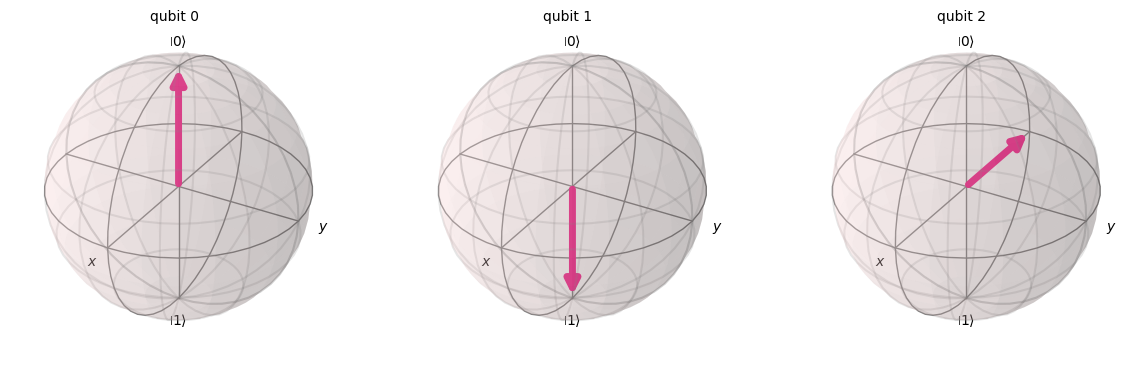

In [13]:
draw_state(qc,latex=False)

7- Swap of an arbitrary quantum state

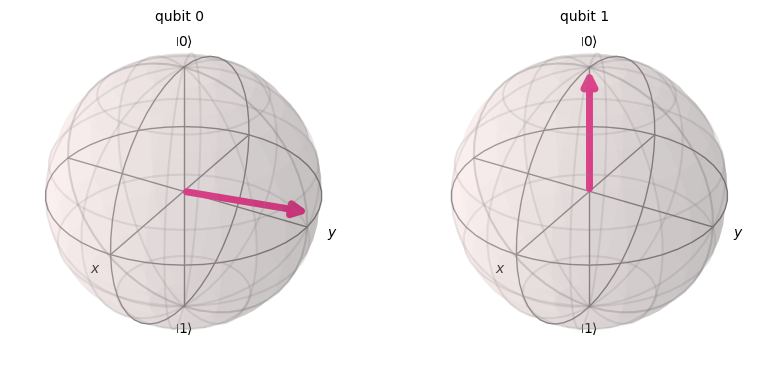

In [14]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
u = random_unitary(2)
qc.unitary(u, q[0], label='U')
draw_state(qc)

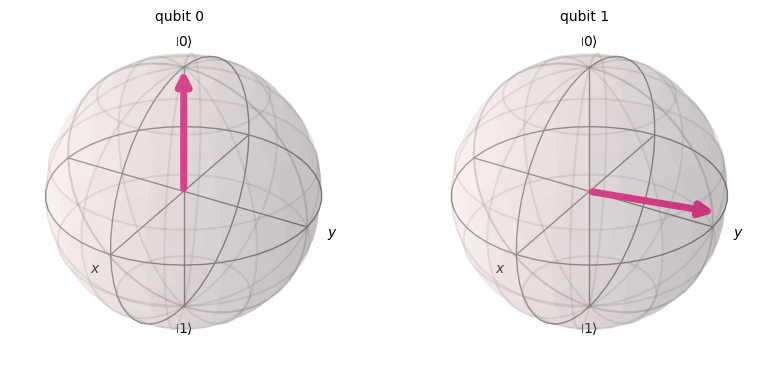

In [15]:
qc.swap(q[0],q[1])
draw_state(qc)

8- Mirror transformation

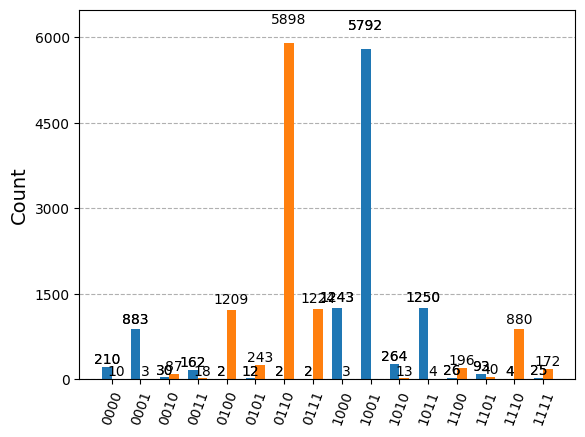

In [16]:
n = 4
unitaries = [random_unitary(2) for i in range(n)]

# qc1
q1 = QuantumRegister(n, name='q')
c1 = ClassicalRegister(n, name='c')
qc1 = QuantumCircuit(q1,c1)

# qc2
q2 = QuantumRegister(n, name='q')
c2 = ClassicalRegister(n, name='c')
qc2 = QuantumCircuit(q2,c2)
qc2.x(q2)

# Applying the unitaries on qc1 and qc2
for i in range(n):
    qc1.unitary(unitaries[i],q1[i],label='U'+str(i))
    qc2.unitary(unitaries[i],q2[i],label='U'+str(i))
    
# Measurements
qc1.measure(q1,c1)
qc2.measure(q2,c2)

qc1_res = run(qc1,n_shots=10000,plot=False)
qc2_res = run(qc2,n_shots=10000,plot=False)
plot_histogram([qc1_res,qc2_res])

9- Reproduction of the quantum circuit

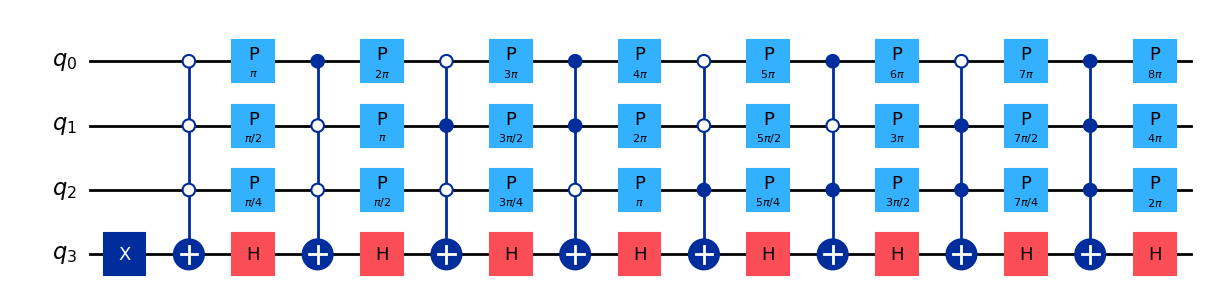

In [17]:
q = QuantumRegister(4,name='q')
qc = QuantumCircuit(q)

qc.x(q[-1])
for i in range(8):
    qc.mcx(qc.qubits[:3],qc.qubits[-1],ctrl_state=bin(i)[2:].zfill(3))
    for j in range(3):
        qc.p((i+1)*np.pi/2**j,q[j])
    qc.h(q[-1])
qc.draw('mpl')

10- Generalization for arbitrary $n$

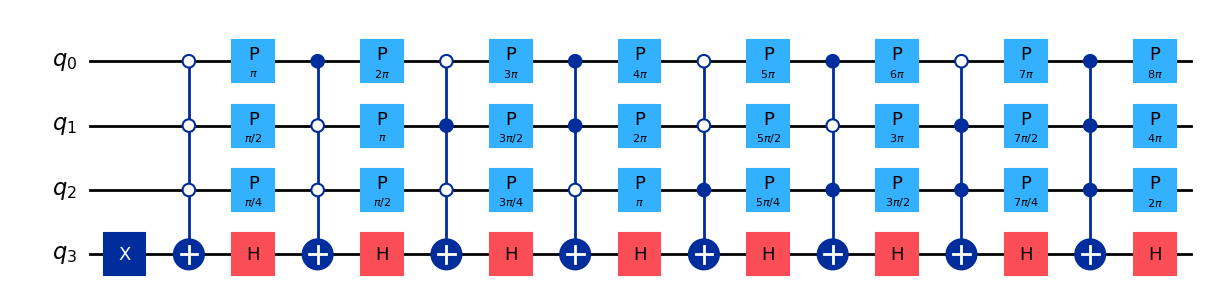

In [18]:
n = 3
q = QuantumRegister(n+1,name='q')
qc = QuantumCircuit(q)

qc.x(q[-1])
for i in range(2**n):
    qc.mcx(qc.qubits[:n],qc.qubits[-1],ctrl_state=bin(i)[2:].zfill(n))
    for j in range(n):
        qc.p((i+1)*np.pi/2**j,q[j])
    qc.h(q[-1])
qc.draw('mpl')

## Cloning qubits ?

1- Single copy in the computational basis

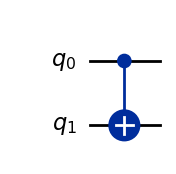

In [19]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw('mpl')

2- Same with second qubit in state 1

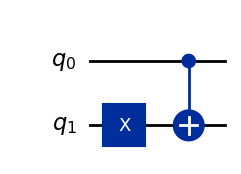

In [20]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.x(q[1])
qc.cx(q[0],q[1])
qc.draw('mpl')

3- Copy of an $n$ qubit string

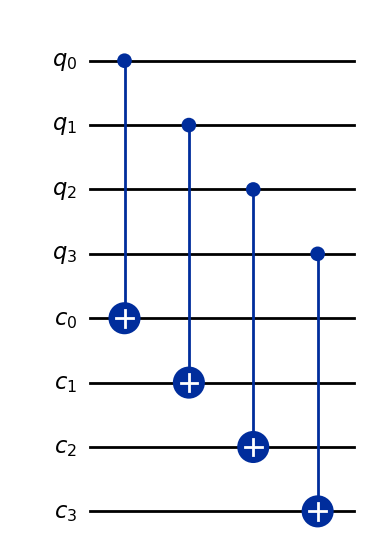

In [21]:
n = 4

q = QuantumRegister(n, name='q')
c = QuantumRegister(n, name='c')
qc = QuantumCircuit(q,c)

for i in range(n):
    qc.cx(q[i],c[i])
    
qc.draw('mpl')

4- Multiple copies in the computational basis

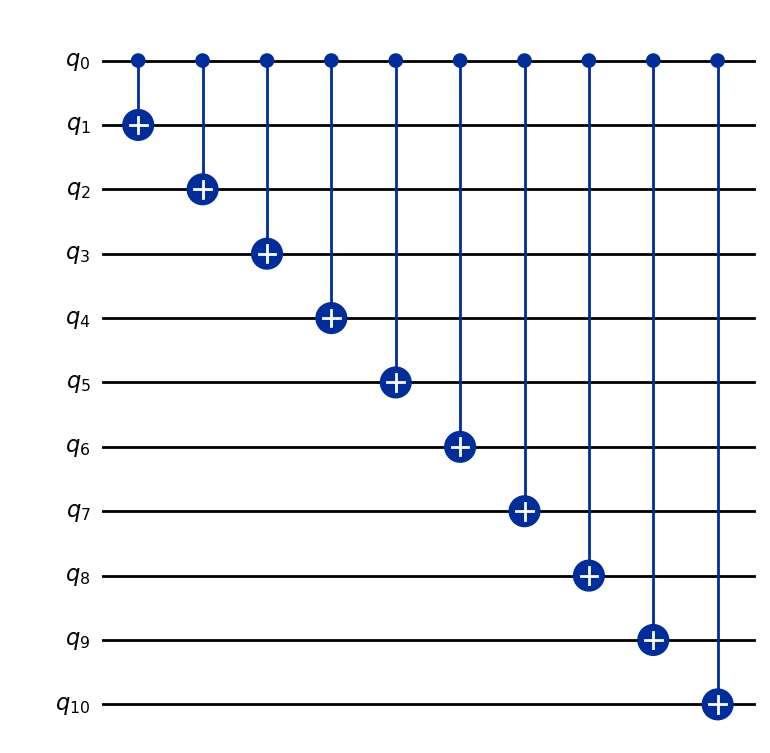

In [22]:
# (a)
def copy_linear(n):
    q = QuantumRegister(n+1, name='q')
    qc = QuantumCircuit(q)
    for i in range(n):
        qc.cx(q[0],q[i+1])
    return qc
    
n = 10
qc = copy_linear(n)
qc.draw('mpl')

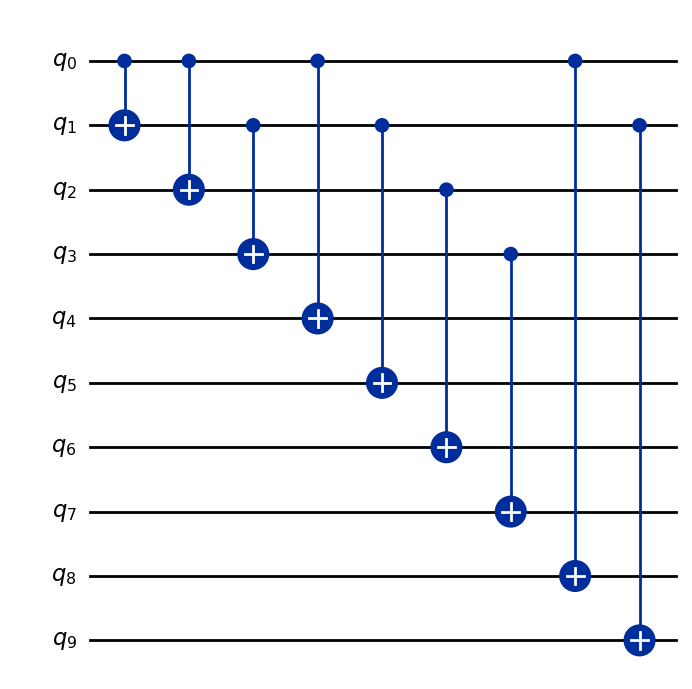

In [23]:
# (b)
def copy_log(n,barrier=False):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    n_copy_done = 0
    for i in range(1+int(np.floor(np.log2(n)))):
        for j in range(2**i):
            if n_copy_done < n-1:
                qc.cx(q[j],q[j+2**i])
                n_copy_done += 1
        if barrier:
            qc.barrier()
    return qc
    
n = 10
qc = copy_log(n)
qc.draw('mpl')

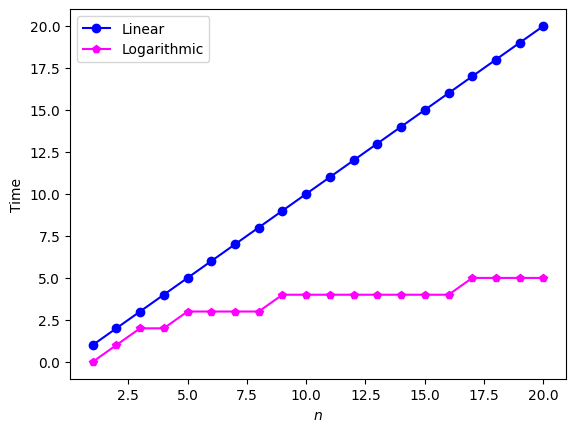

In [24]:
# (c)
n = 20

linear = []
log = []
for i in range(1,n+1):
    linear.append(copy_linear(i).depth())
    log.append(copy_log(i).depth())

plt.plot(1+np.arange(n),linear,color='b',label='Linear',marker='o')
plt.plot(1+np.arange(n),log,color='magenta',label='Logarithmic',marker='p')
plt.xlabel('$n$')
plt.ylabel('Time')
plt.legend()
plt.show()

## Single qubit interference

1- Single qubit interference implementation

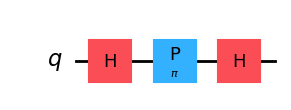

In [25]:
phi = np.pi

q = QuantumRegister(1,name='q')
qc = QuantumCircuit(q)
qc.h(q)
qc.p(phi,q)
qc.h(q)

qc.draw('mpl')

2- Plot the 0 probability for different phases

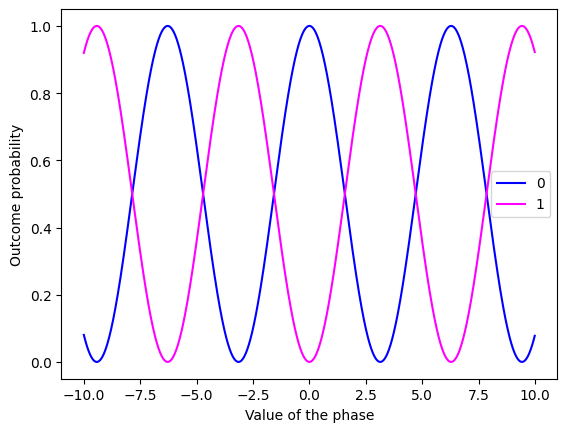

In [26]:
def get_proba(k,phi):
    q = QuantumRegister(1,name='q')
    qc = QuantumCircuit(q)
    qc.h(q)
    qc.p(phi,q)
    qc.h(q)
    qc.save_statevector()
    simulator = AerSimulator()
    psi = simulator.run(qc).result().get_statevector(qc)
    return abs(psi[k])**2

x = np.arange(-10, 10, 0.01)
prob0 = np.array([get_proba(0,i) for i in x])
prob1 = np.array([get_proba(1,i) for i in x])
plt.plot(x,prob0,color='blue',label='0')
plt.plot(x,prob1,color='magenta',label='1')
plt.xlabel('Value of the phase')
plt.ylabel('Outcome probability')
plt.legend()
plt.show()

## Superdense Coding

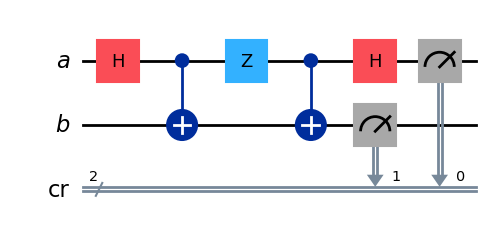

In [27]:
def superdense_coding(b2,b1):
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(a,b,cr)
    qc.h(a)
    qc.cx(a,b)
    if b2 == 1:
        qc.x(a)
    if b1 == 1:
        qc.z(a)
    qc.cx(a,b)
    qc.h(a)
    qc.measure(a,cr[0])
    qc.measure(b,cr[1])
    return qc

qc = superdense_coding(0,1)
qc.draw('mpl')

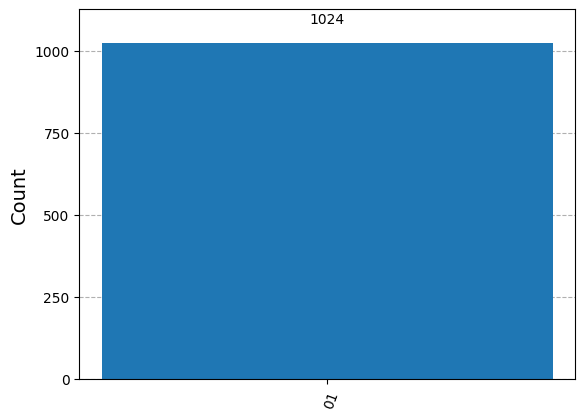

In [28]:
run(qc)

## Quantum Teleportation

1- Implementation of the Quantum Teleportation protocol

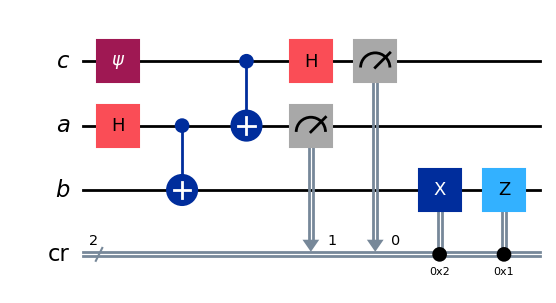

In [29]:
def initial_state(psi):
    c = QuantumRegister(1,name='c')
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(c,a,b,cr)

    qc.unitary(psi,c,label='$\psi$')
    qc.h(a)
    qc.cx(a,b)
    return qc

def quantum_teleportation(psi):
    c = QuantumRegister(1,name='c')
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(c,a,b,cr)

    qc.unitary(psi,c,label='$\psi$')
    qc.h(a)
    qc.cx(a,b)
    qc.cx(c,a)
    qc.h(c)

    qc.measure(c,cr[0])
    qc.measure(a,cr[1])

    qc.x(2).c_if(cr, 2)  
    qc.z(2).c_if(cr, 1)
    return qc

psi = random_unitary(2)
before_tp = initial_state(psi)
after_tp = quantum_teleportation(psi)
after_tp.draw('mpl')

2- Plot of the Bloch Sphere before and after teleporation of $|\psi>$

Before quantum teleportation:


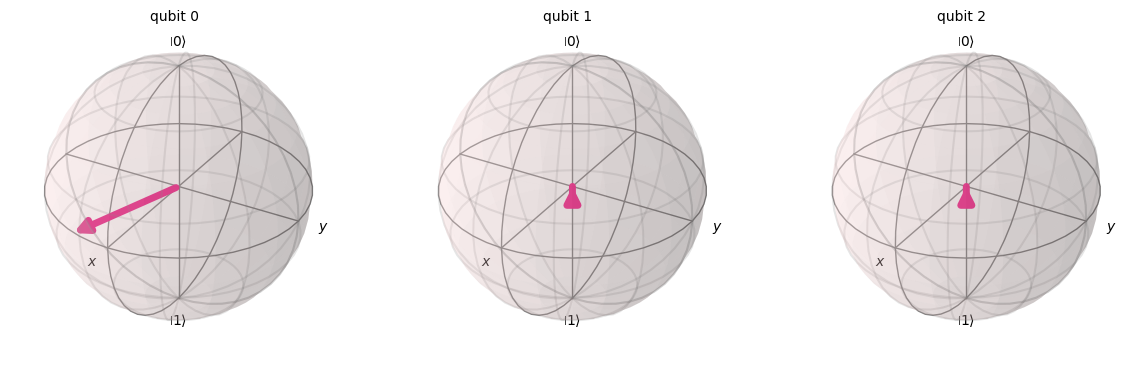

In [30]:
print('Before quantum teleportation:')
draw_state(before_tp)

After quantum teleportation:


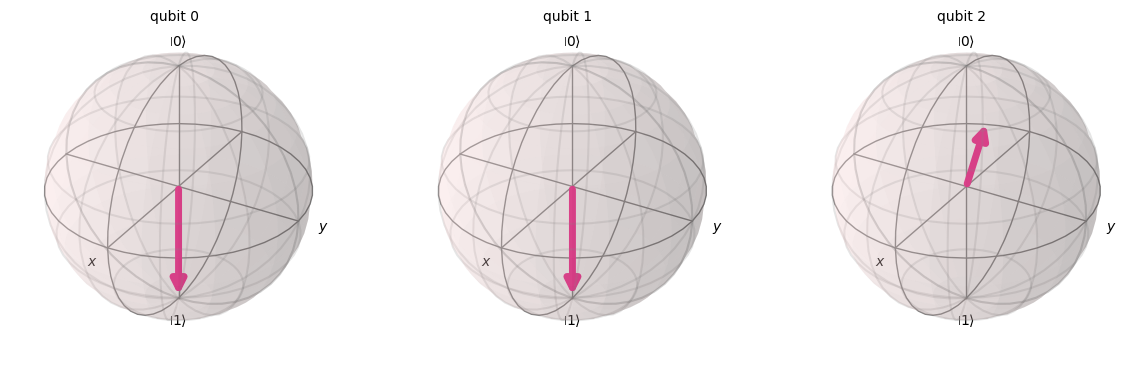

In [31]:
print('After quantum teleportation:')
draw_state(after_tp)

## Enumeration

1- Naïve enumeration with $X$ gates

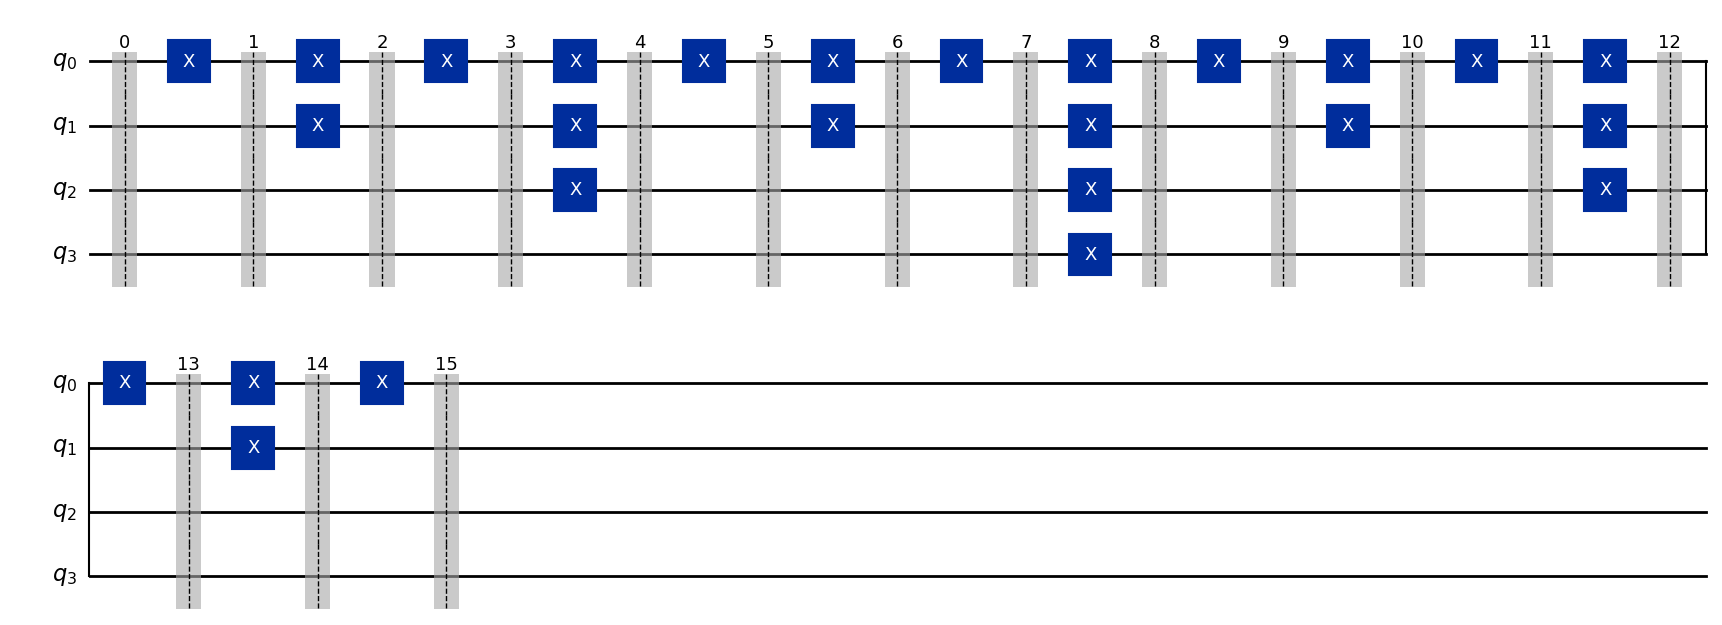

In [32]:
def count_x_gates(circuit):
    """Count the number of X gates in a quantum circuit."""
    return sum(1 for instr, qargs, cargs in circuit.data if instr.name == 'x')
    
def int_to_binary_string(n, length):
    """Convert an integer to a binary string with a specified length."""
    binary_string = bin(n)[2:]  # Convert to binary and remove '0b' prefix
    return binary_string.zfill(length)  # Pad the string to the specified length

def indices_of_differing_bits(bin1, bin2):
    """Return the indices of bits that differ between two binary strings."""
    # Ensure both binary strings have the same length by padding with zeros
    max_len = max(len(bin1), len(bin2))
    bin1 = bin1.zfill(max_len)
    bin2 = bin2.zfill(max_len)
    
    # Find indices where the bits differ
    differing_indices = [i for i, (bit1, bit2) in enumerate(zip(bin1, bin2)) if bit1 != bit2]
    return differing_indices

def counting(n):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    
    for i in range(2**n):
        qc.save_statevector(label=str(i))
        binary = int_to_binary_string(i,n)[::-1]
        if i < 2**n-1:
            next_binary = int_to_binary_string(i+1,n)[::-1]
        index = indices_of_differing_bits(binary,next_binary)
        for j in index:
            qc.x(q[j])
    return qc

n = 4
qc = counting(n)
qc.draw('mpl')

Bloch Sphere representation of 15 in the computational basis:


<IPython.core.display.Latex object>

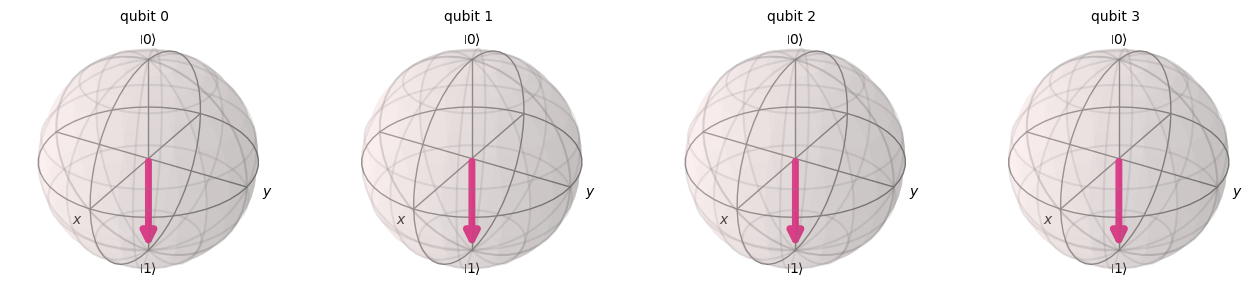

In [33]:
simulator = AerSimulator()
result = simulator.run(qc).result()
for i in range(2**n):
    psi = result.data(0)[str(i)]
    clear_output(wait=True)
    print('Bloch Sphere representation of '+str(i)+' in the computational basis:')
    display(psi.draw('latex'))
    display(plot_bloch_multivector(psi))
    time.sleep(1)
clear_output(wait=True)

2- Gray code enumeration with $X$ gates

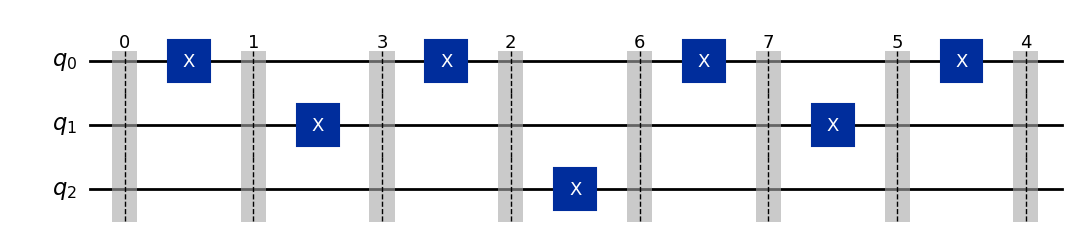

In [34]:
def generate_gray_code(n):
    """Generate an n-bit Gray code sequence."""
    if n == 0:
        return ["0"]
    elif n == 1:
        return ["0", "1"]
    else:
        # Generate the (n-1)-bit Gray code sequence recursively
        prev_gray_code = generate_gray_code(n - 1)
        # Prefix the (n-1)-bit Gray code with '0' and '1'
        first_half = ['0' + code for code in prev_gray_code]
        second_half = ['1' + code for code in reversed(prev_gray_code)]
        return first_half + second_half

def find_changing_bit_index(code1, code2):
    """Find the index of the changing bit between two Gray code elements."""
    # Convert the binary strings to integers
    int1 = int(code1, 2)
    int2 = int(code2, 2)
    
    # Compute the XOR of the two integers
    xor_result = int1 ^ int2
    
    # Find the position of the bit that is set to 1
    changing_bit_index = xor_result.bit_length() - 1
    return changing_bit_index

def gray_counting(n,gray_code_sequence):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    
    for i in range(len(gray_code_sequence)-1):
        qc.save_statevector(label=str(int(gray_code_sequence[i],2)))
        index = find_changing_bit_index(gray_code_sequence[i],gray_code_sequence[i+1])
        qc.x(q[index])
        
    qc.save_statevector(label=str(int(gray_code_sequence[-1],2)))
    return qc
    
n = 3
gray_code_sequence = generate_gray_code(n)
qc = gray_counting(n,gray_code_sequence)
qc.draw('mpl')

Bloch Sphere representation of 4 in the computational basis:


<IPython.core.display.Latex object>

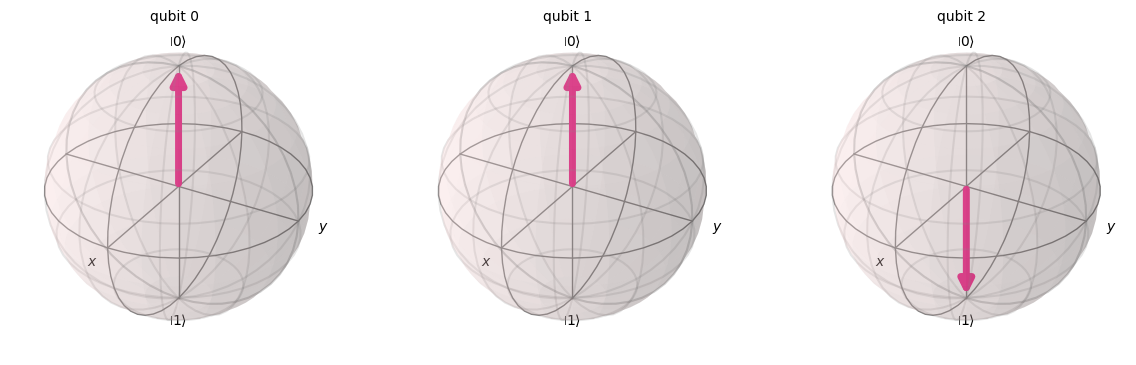

In [35]:
simulator = AerSimulator()
result = simulator.run(qc).result()
for i in range(2**n):
    psi = result.data(0)[str(int(gray_code_sequence[i],2))]
    clear_output(wait=True)
    print('Bloch Sphere representation of '+str(int(gray_code_sequence[i],2))+' in the computational basis:')
    display(psi.draw('latex'))
    display(plot_bloch_multivector(psi))
    time.sleep(3)
clear_output(wait=True)

3- Plot of the Naïve VS Gray code enumeration

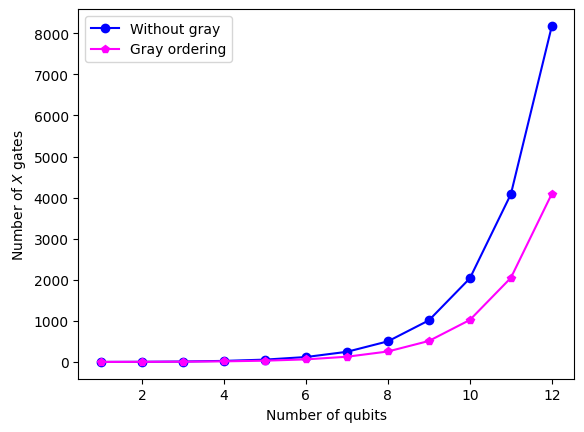

In [36]:
n_max = 12
n_values = np.arange(1,n_max+1)
no_gray = [count_x_gates(counting(n)) for n in n_values]
gray = [count_x_gates(gray_counting(n,generate_gray_code(n))) for n in n_values]

plt.plot(n_values,no_gray,color='b',label='Without gray',marker='o')
plt.plot(n_values,gray,color='magenta',label='Gray ordering',marker='p')
plt.xlabel('Number of qubits')
plt.ylabel('Number of $X$ gates')
plt.legend()
plt.show()

## Quantum Fourier Transform

1- Implementation of the QFT

In [37]:
def qft_rotations(k):
    return np.array([[1,0],[0,np.exp(2*np.pi*1j/2**k)]])

def qft(n,swaps=True):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    # Rotations and Hadamards
    for i in range(n):
        qc.h(q[n-i-1])
        for j in range(2,n+1-i):
            #gate = UnitaryGate(qft_rotations(j),label='R'+str(j))
            #qc.append(gate.control(),[q[n-i-j],q[n-i-1]])
            #qc.append(U1Gate(2*np.pi/2**j,label='R'+str(j)).control(1),[q[n-i-j],q[n-i-1]])
            qc.cp(2*np.pi/2**j,q[n-i-j],q[n-i-1])
    # Swaps
    if swaps:
        for i in range(n//2):
            qc.swap(q[i],q[n-i-1])
    
    return qc

2- QFT for 1 qubit

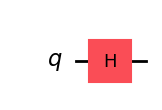

In [38]:
qc = qft(1)
qc.draw('mpl')

3- Fourier counting

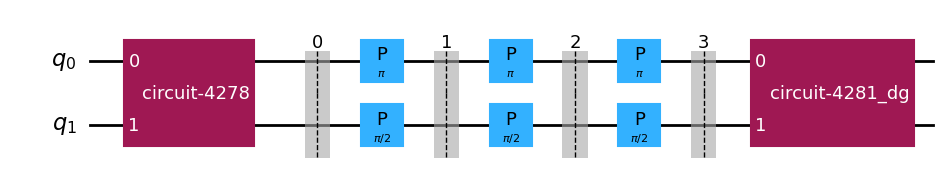

In [39]:
def fourier_counting(n):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    qc.append(qft(n,swaps=False),qc.qubits)
    for k in range(2**n-1):
        qc.save_statevector(label=str(k))
        for j in range(n):
            angle = 2*np.pi/(2**(j+1))
            qc.p(angle, q[j])
    qc.save_statevector(label=str(2**n-1))
    qc.append(qft(n,swaps=False).inverse(),qc.qubits)
    return qc

n = 2
qc = fourier_counting(n)
qc.decompose(reps=0).draw('mpl')

Bloch Sphere representation of 3 in the Fourier basis:


<IPython.core.display.Latex object>

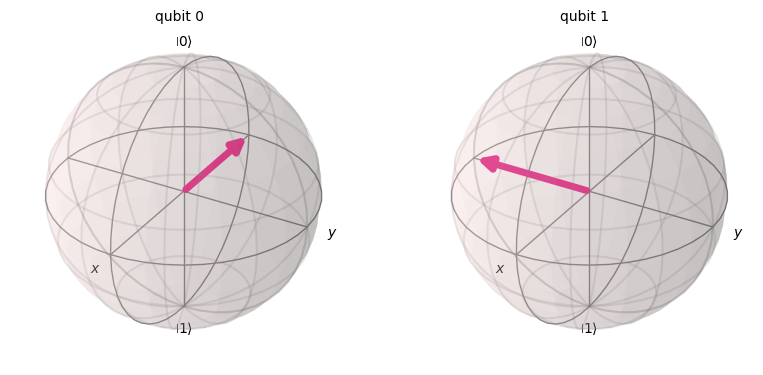

In [40]:
simulator = AerSimulator()
qc_transpile = transpile(qc, simulator)
result = simulator.run(qc_transpile).result()
for i in range(2**n):
    psi = result.data(0)[str(i)]
    clear_output(wait=True)
    print('Bloch Sphere representation of '+str(i)+' in the Fourier basis:')
    display(psi.draw('latex'))
    display(plot_bloch_multivector(psi))
    time.sleep(3)
clear_output(wait=True)

4- QFT complexity

The QFT circuit has $n$ qubits, we apply $n$ gates on the first qubit, $n-1$ on the second, $n-2$ on the third, etc..
In the end, the number of 1 and 2 qubits gates in the circuit (without counting the swaps) is:
$$\sum_{k=1}^n k = \frac{n(n+1)}{2}=O(n^2)$$
Therefore, the complexity of the QFT scales polynomially (quadratically) with the number of qubits, giving an exponential speedup over the FFT for large values of $N$.

## Quantum Phase Estimation

1- Implementation of QPE

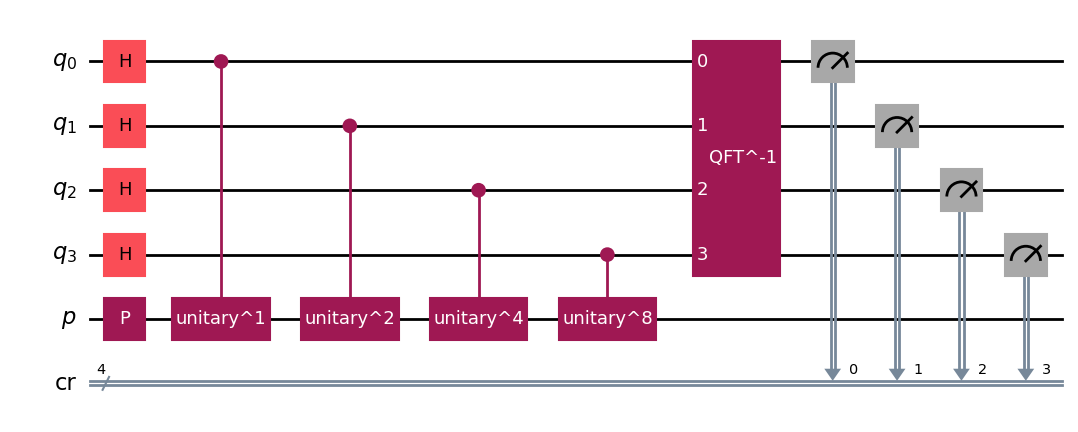

In [41]:
def QPE(n,psi,U):
    q = QuantumRegister(n,name='q')
    p = QuantumRegister(1,name='p')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(q,p,cr)
    inverse_qft = qft(n).inverse().to_gate(label='QFT^-1')
    qc.h(q)
    qc.unitary(psi,p,label='P')
    for i in range(n):
        gate = UnitaryGate(U,label='U^'+str(i))
        qc.append(gate.power(2**i).control(),[q[i],p])
    qc.append(inverse_qft,[k for k in q])
    qc.measure(q,cr)
    return qc

U = np.array([[1,0],[0,-1]]) # Z gate
psi = np.array([[1,0],[0,1]]) # I
qc = QPE(4,psi,U)
qc.draw('mpl')

2- Approximation of $\pi$

a- Computation

In [42]:
def estimate_pi(n):
    U = np.array([[1,0],[0,np.exp(1j)]])
    psi = np.array([[0,1],[1,0]]) # X
    qc = QPE(n,psi,U)
    res = run(qc,plot=False,n_shots=10000)
    phase = int(max(res, key=res.get),2)/2**n
    pi = 1/(2*phase)
    return pi

b- Plot

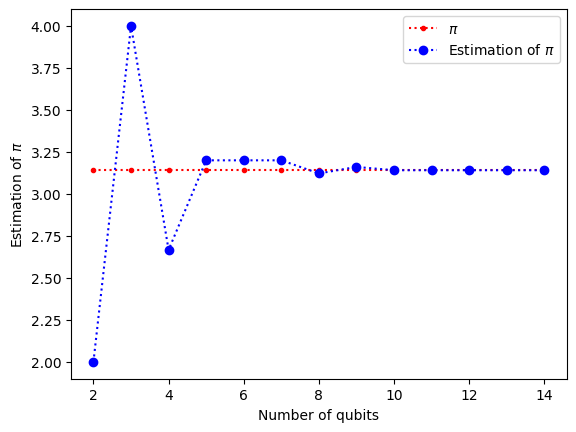

In [43]:
x = [n for n in range(2,15)]
y = [estimate_pi(n) for n in x]
pi = [np.pi for i in x]
plt.plot(x,pi,label='$\pi$',color='red',marker='.',linestyle='dotted')
plt.plot(x,y,label='Estimation of $\pi$',color='blue',marker='o',linestyle='dotted')
plt.legend()
plt.xlabel('Number of qubits')
plt.ylabel('Estimation of $\pi$')
plt.show()

## Draper Adder

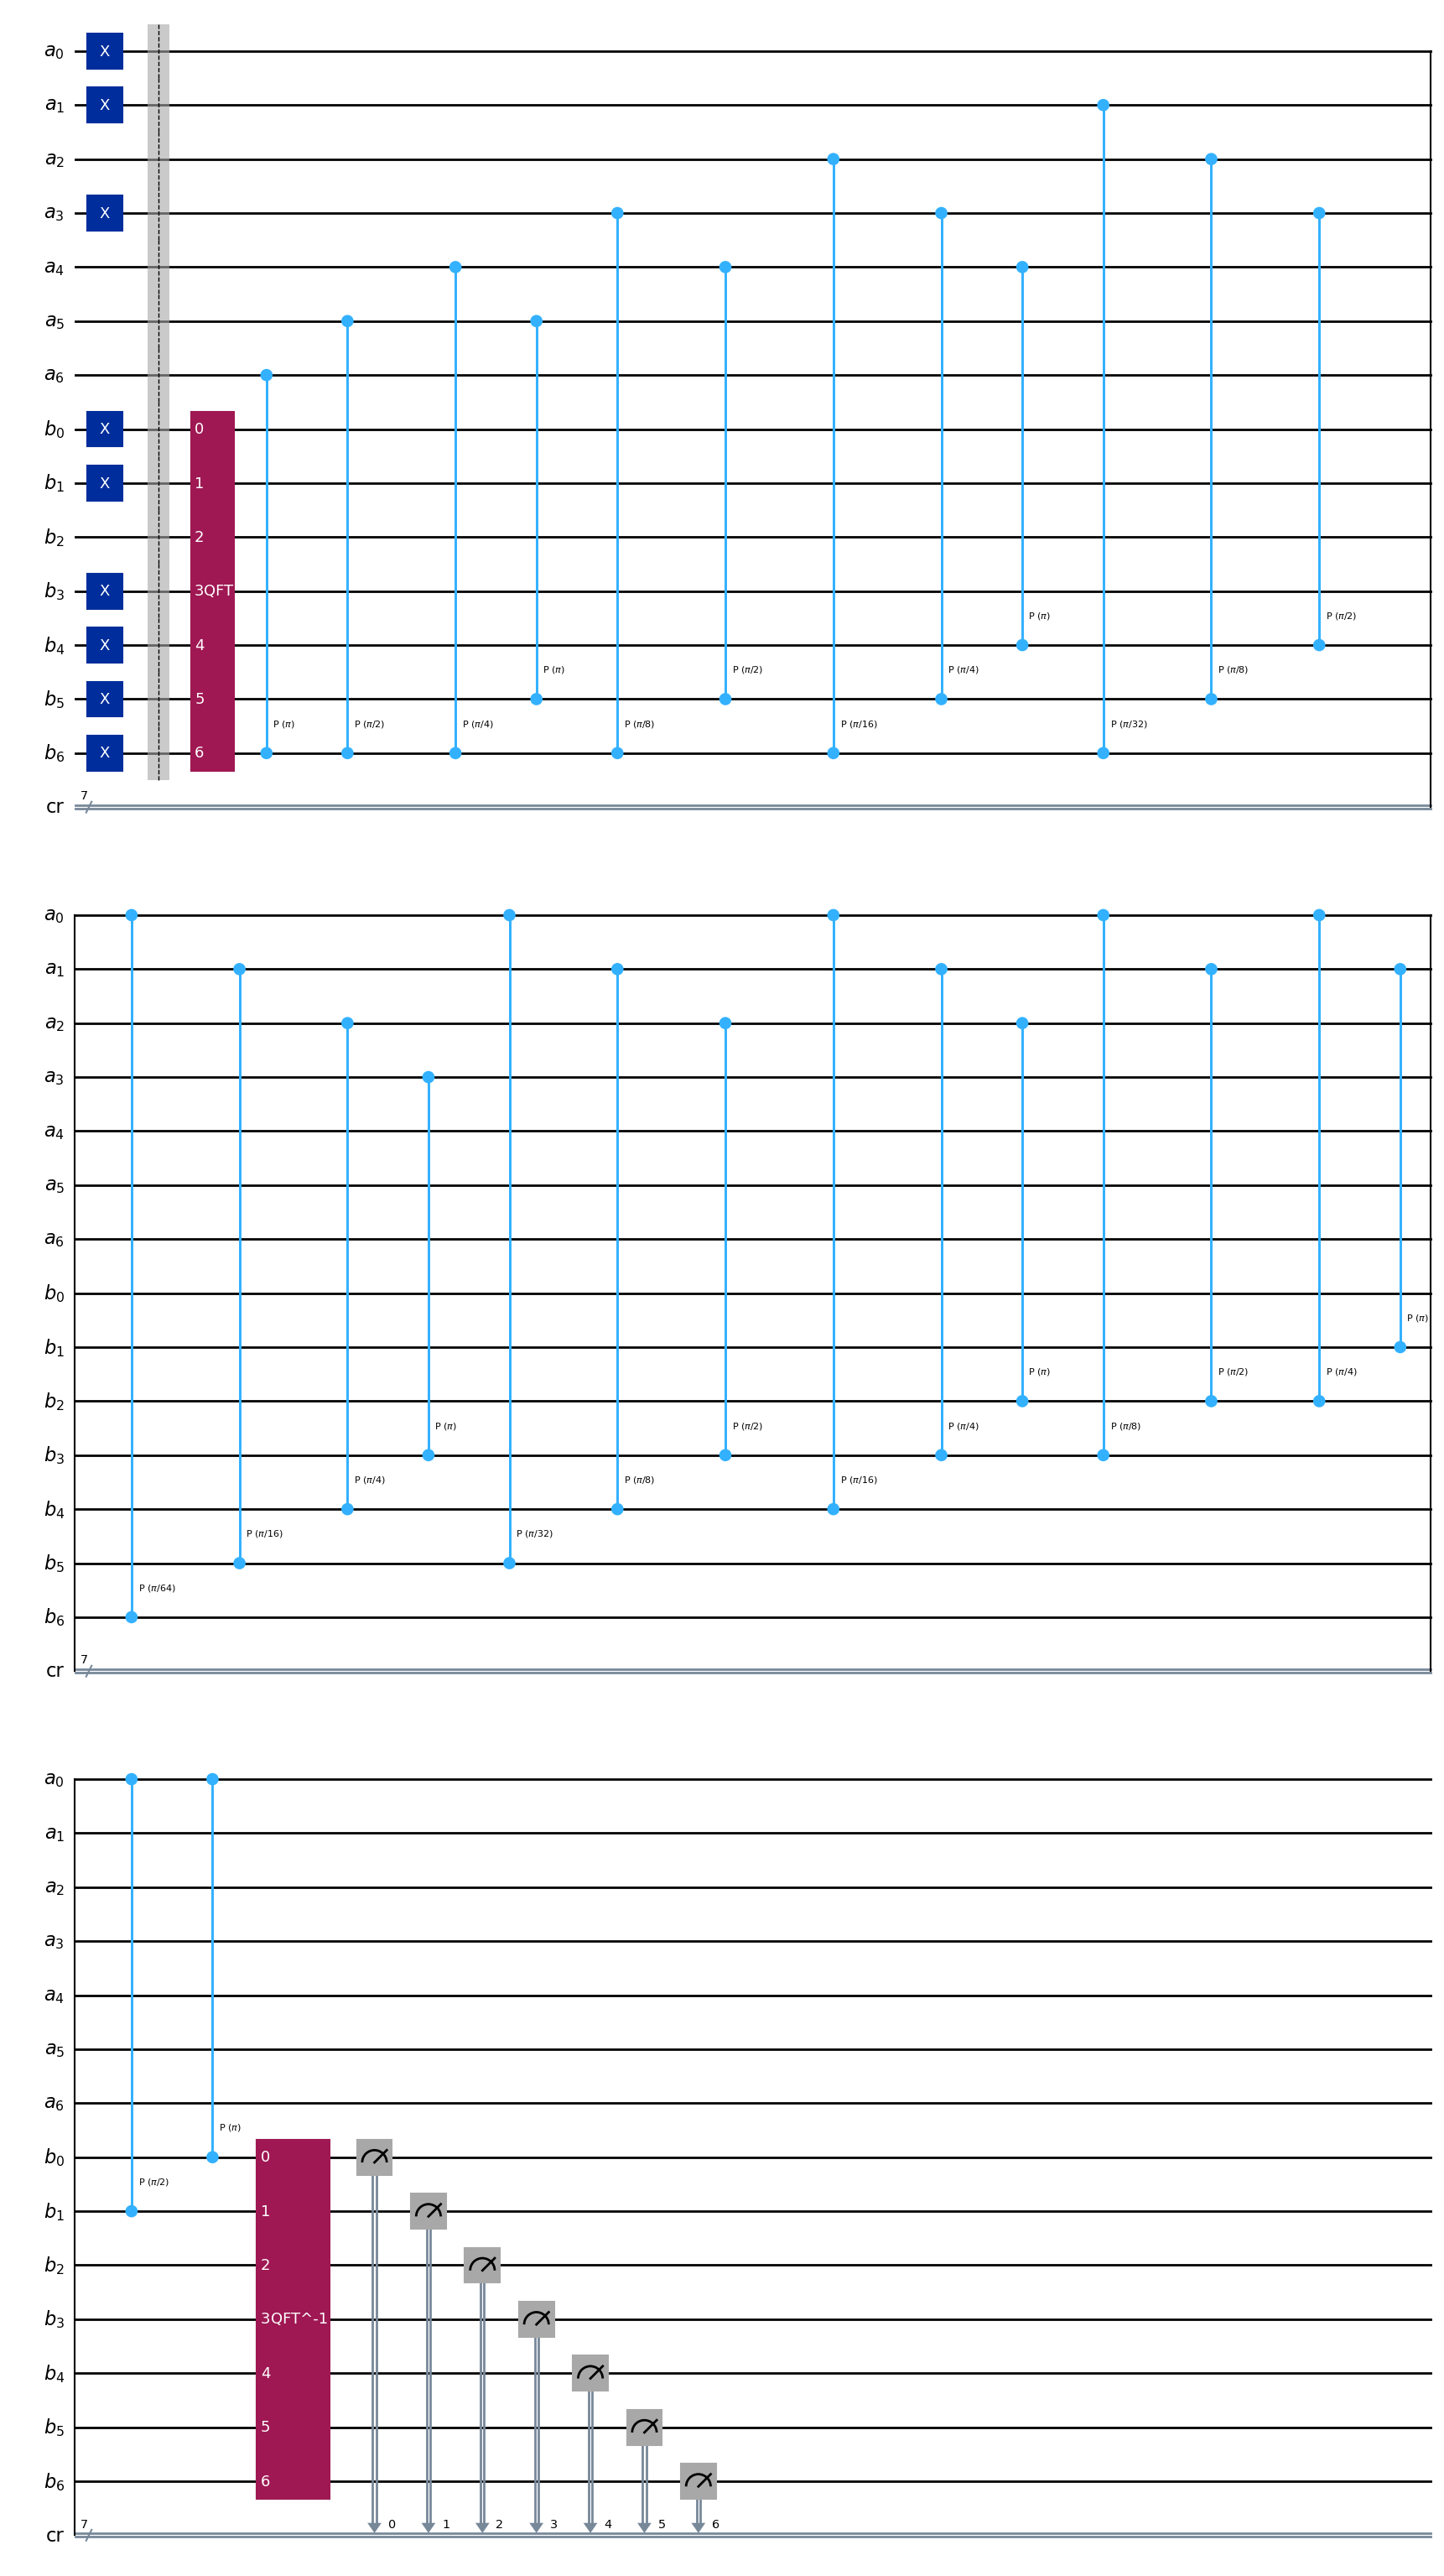

In [44]:
def Draper_Adder(x,y,sub=False):
    # if sub = True, the circuit computes y-x, where y corresponds to the register 'b'
    # Finding the number of qubits needed
    n = max(len(bin(x)[2:].zfill(0)),len(bin(y)[2:].zfill(0)))
    x_binary = bin(x)[2:].zfill(n)[::-1]
    y_binary = bin(y)[2:].zfill(n)[::-1]
    a = QuantumRegister(n,name='a')
    b = QuantumRegister(n,name='b')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(a,b,cr)

    # Initialization of the registers
    for i in range(n):
        if x_binary[i] == '1':
            qc.x(a[i])
        if y_binary[i] == '1':
            qc.x(b[i])
    qc.barrier()
    
    # Draper Adder
    qft_gate = qft(n,swaps=False).to_gate(label='QFT')
    inverse_qft = qft(n,swaps=False).inverse().to_gate(label='QFT^-1')
    qc.append(qft_gate,[i for i in b])
    for i in range(n):
        for j in range(n-i):
            if sub:
                qc.cp(-2*np.pi/2**(j+1),a[n-i-j-1],b[n-i-1])
                #qc.append(U1Gate(-2*np.pi/2**(j+1),label='R'+str(j+1)).control(1),[a[n-i-j-1],b[n-i-1]])
            else:
                qc.cp(2*np.pi/2**(j+1),a[n-i-j-1],b[n-i-1])
                #qc.append(U1Gate(2*np.pi/2**(j+1),label='R'+str(j+1)).control(1),[a[n-i-j-1],b[n-i-1]])
    qc.append(inverse_qft,[i for i in b])
    qc.measure(b,cr)
    return qc

x = 11
y = 123
sub = False
qc = Draper_Adder(x,y,sub=sub)
qc.draw('mpl')

In [45]:
draper_verification(qc,x,y,sub=sub)

True

## Bernstein-Vazirani Algorithm

Random bit string: 0110000000


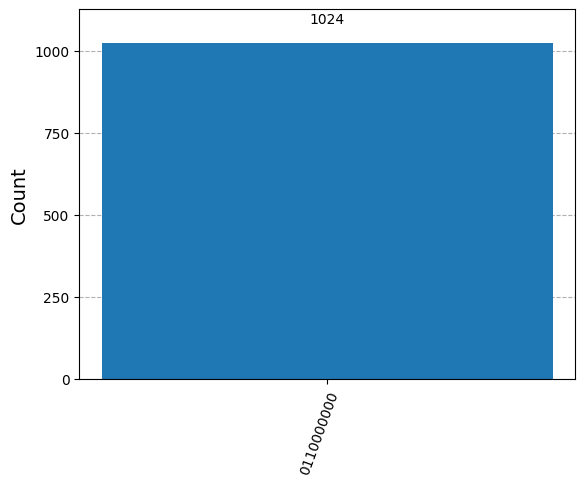

In [46]:
def rand_string(n):
    key = ""
    for i in range(n):
        temp = str(random.randint(0, 1))
        key += temp       
    return key

def bernstein_vazirani(n):
    secretnumber = rand_string(n)
    qc = QuantumCircuit(n+1,n)

    qc.h(range(n))
    qc.x(n)
    qc.h(n)

    qc.barrier()

    for index, bit in enumerate(reversed(secretnumber)):
        if bit == '1':
            qc.cx(index,n)

    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n),range(n))
    print('Random bit string:',secretnumber)
    return qc

n = 10
qc = bernstein_vazirani(n)
run(qc)

## Grover's Algorithm

1- Implementation of Grover's algorithm

Number of iterations:  3


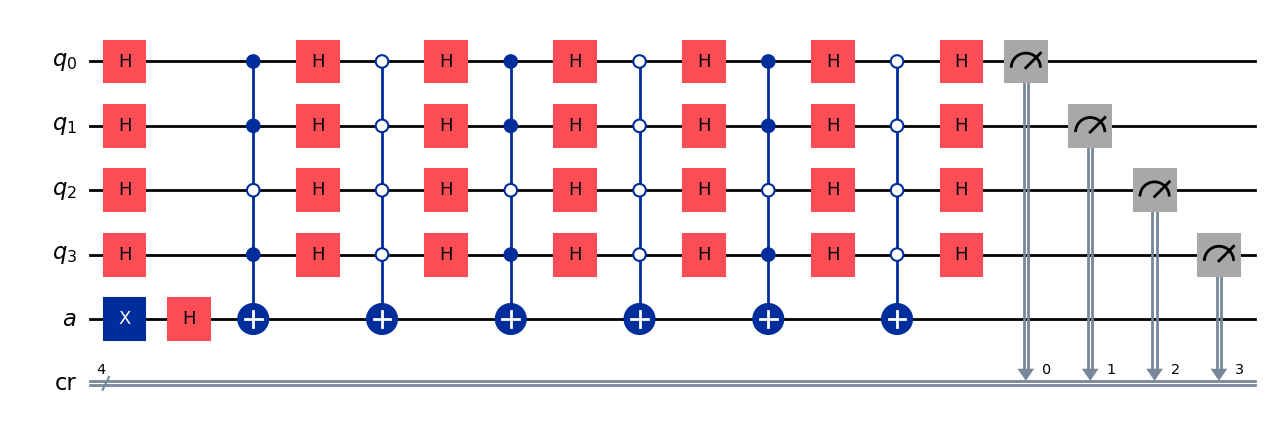

In [47]:
def grover(n,target_state):
    q = QuantumRegister(n,name='q')
    ancilla = QuantumRegister(1,name='a')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(q,ancilla,cr)
    qc.x(ancilla)
    qc.h(ancilla)
    qc.h(q)
    k = int(np.floor(np.pi*np.sqrt(2**n)/4))
    print('Number of iterations: ',str(k))
    for i in range(k):
        # oracle
        qc.mcx(qc.qubits[:n], qc.qubits[-1],ctrl_state=target_state)
        # diffusion
        qc.h(q)
        qc.mcx(qc.qubits[:n], qc.qubits[-1],ctrl_state='0'*n)
        qc.h(q)
    
    qc.measure(q,cr)
    return qc

n = 4
target_state = '1011'
qc = grover(n,target_state)
qc.draw('mpl')

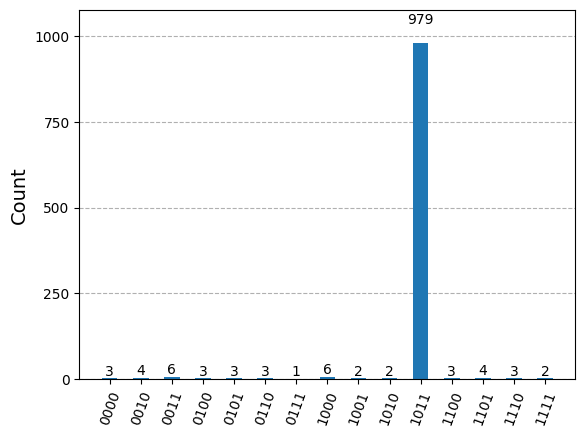

In [48]:
run(qc)

2- Plot of the evolution of the success probability

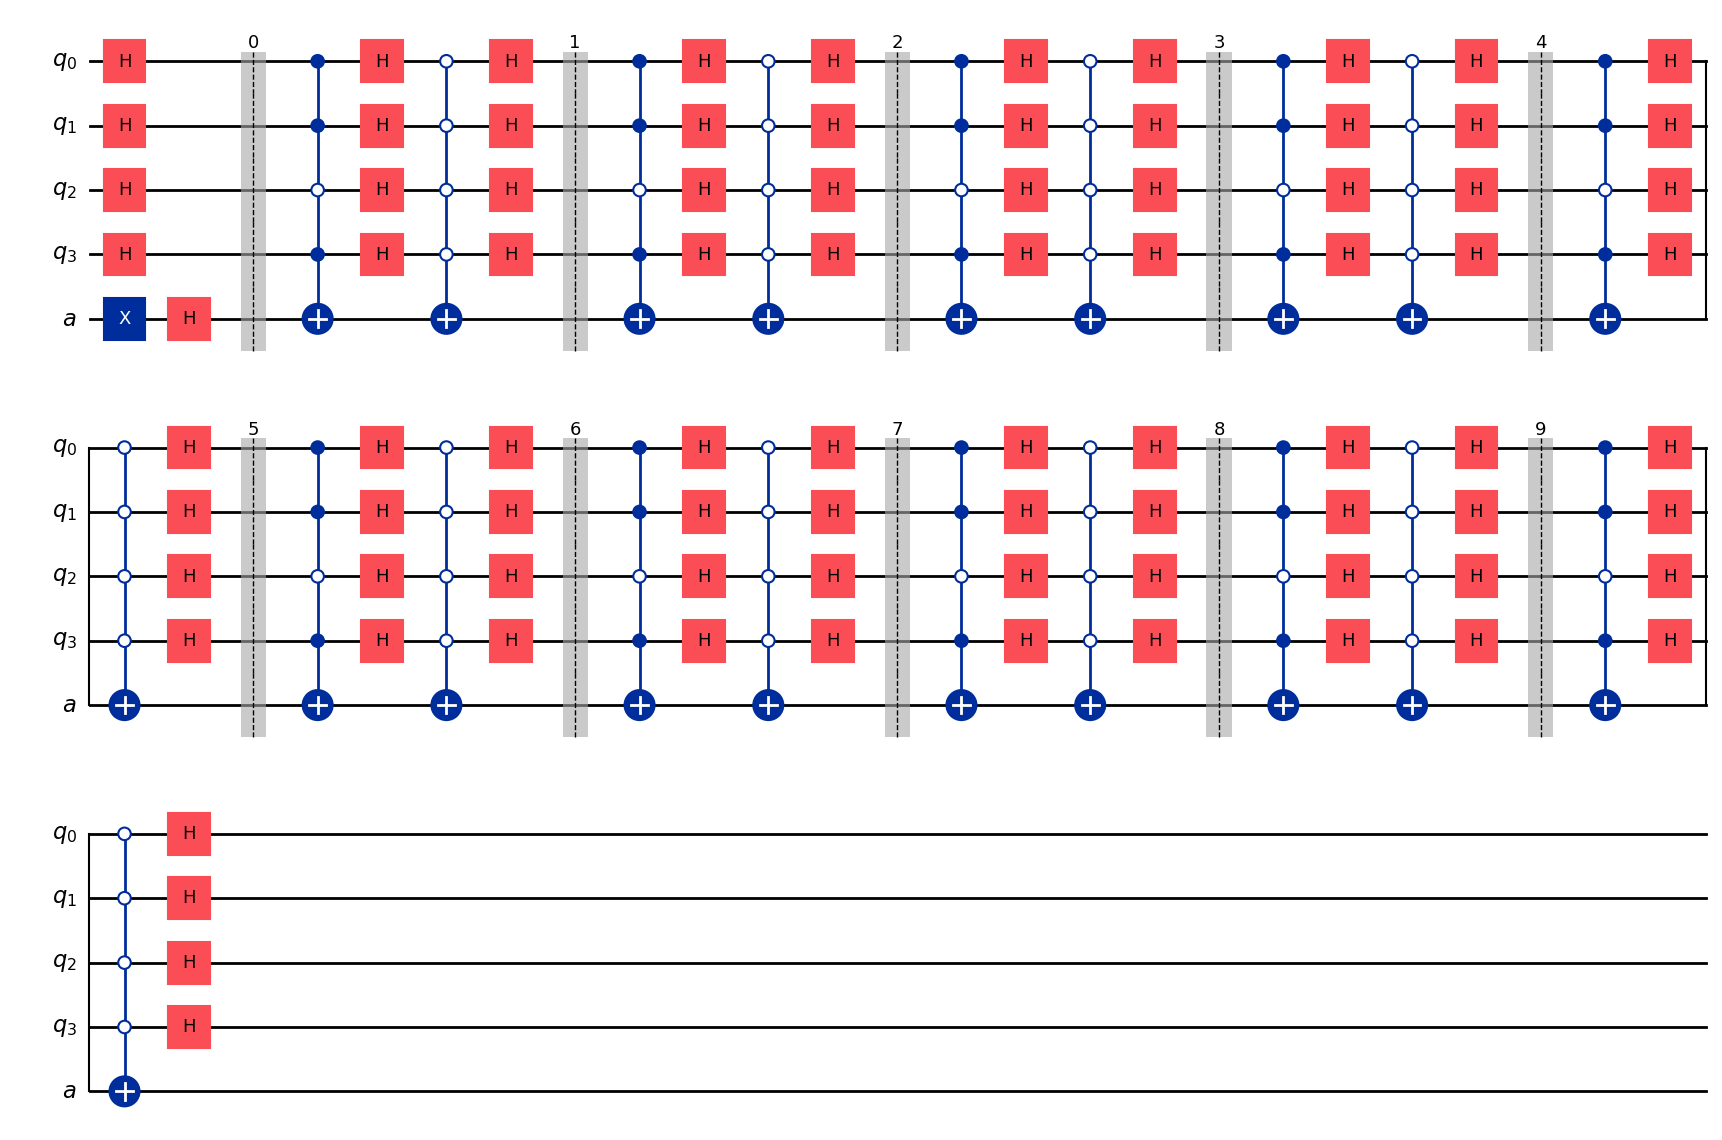

In [49]:
def grover_success(n,target_state,max_iter):
    q = QuantumRegister(n,name='q')
    ancilla = QuantumRegister(1,name='a')
    qc = QuantumCircuit(q,ancilla)
    qc.x(ancilla)
    qc.h(ancilla)
    qc.h(q)
    for i in range(max_iter):
        qc.save_statevector(label=str(i))
        # oracle
        qc.mcx(qc.qubits[:n], qc.qubits[-1],ctrl_state=target_state)
        # diffusion
        qc.h(q)
        qc.mcx(qc.qubits[:n], qc.qubits[-1],ctrl_state='0'*n)
        qc.h(q)
    return qc

max_iter = 10
qc = grover_success(n,target_state,max_iter)
qc.draw('mpl')

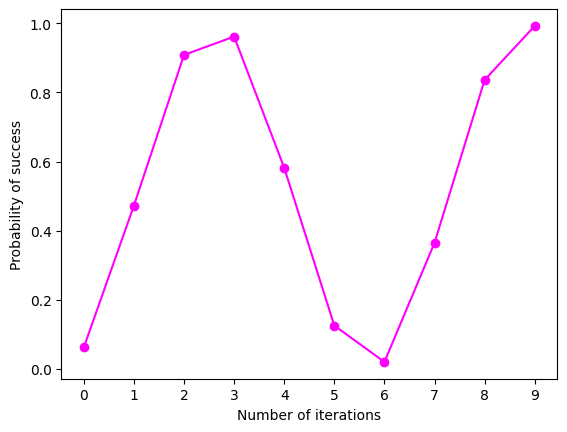

In [50]:
simulator = AerSimulator()
qc_transpile = transpile(qc, simulator)
result = simulator.run(qc_transpile).result()

prob = []
for i in range(max_iter):
    psi = result.data(0)[str(i)]
    prob_dict = psi.probabilities_dict()
    prob.append(prob_dict['0'+target_state] + prob_dict['1'+target_state])

plt.plot(np.arange(max_iter),prob,color='magenta',marker='o')
plt.xlabel('Number of iterations')
plt.ylabel('Probability of success')
plt.xticks(np.arange(max_iter))
plt.show()